# E-Commerce Shipping - Advanced EDA (심화 데이터 탐색)



**목차:**
1. 데이터 로드 및 개요 (Data Overview)
2. 단변량 분석 (Univariate Analysis)
3. 이변량 분석 (Bivariate Analysis - Target과의 관계)
4. 다변량 분석 (Multivariate Analysis)
5. 통계적 가설 검정 (Statistical Hypothesis Testing)
6. 결론 및 인사이트 (Conclusion & Insights)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# 한글 폰트 설정
if os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')
elif os.name == 'posix':
    plt.rc('font', family='AppleGothic')
else:
    print("Unknown OS")

plt.rc('axes', unicode_minus=False)
sns.set_palette("pastel")
import warnings
warnings.filterwarnings('ignore')

## 1. 데이터 로드 및 개요 (Data Overview)
기초 통계량, 결측치, 데이터 타입을 확인합니다.

In [12]:
df = pd.read_csv('data/Train.csv')

# 타겟 변수 명 변경
if 'Reached.on.Time_Y.N' in df.columns:
    df = df.rename(columns={'Reached.on.Time_Y.N': 'target'})

display(df.head())
print("데이터 크기:", df.shape)
display(df.info())
display(df.describe())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,target
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


데이터 크기: (10999, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  target               10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


None

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,target
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## 2. 단변량 분석 (Univariate Analysis)
개별 변수의 분포와 특성을 파악합니다.

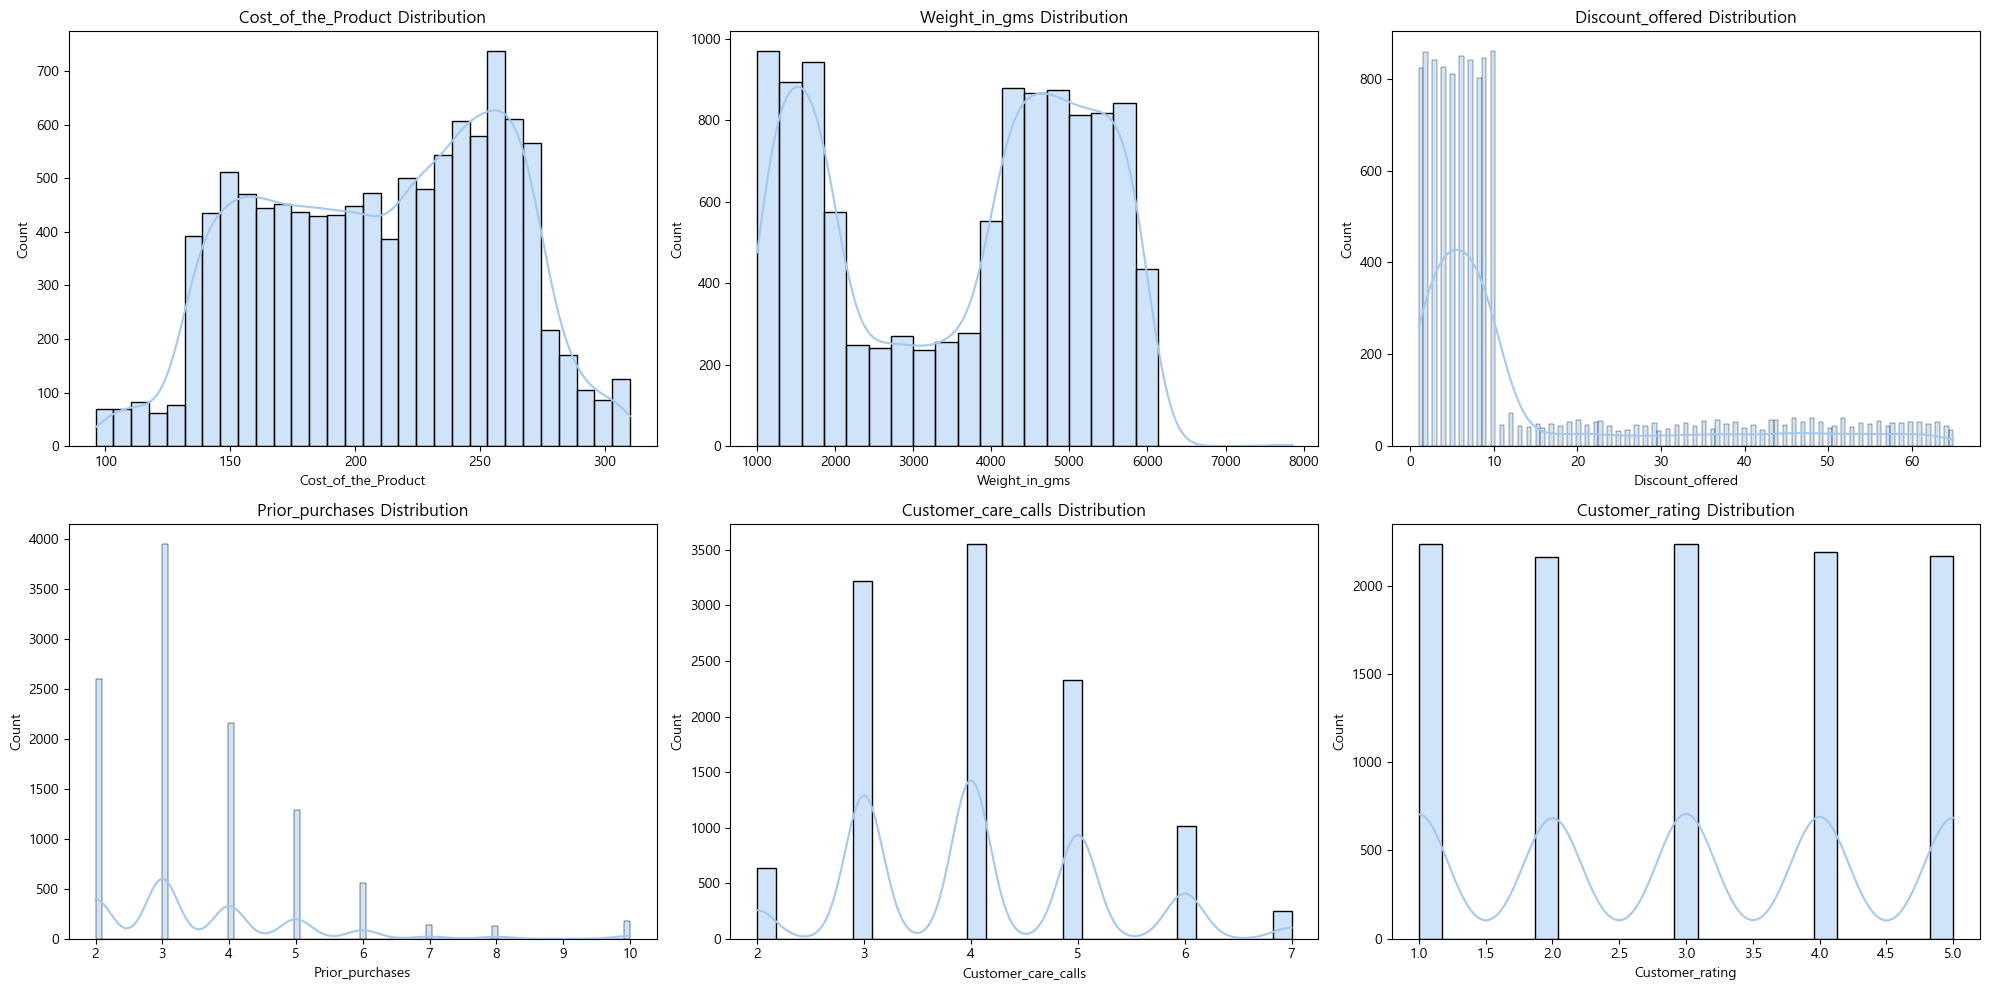

In [13]:
# 수치형 변수 리스트
numeric_cols = ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered', 'Prior_purchases', 'Customer_care_calls', 'Customer_rating']

# 수치형 변수 분포 시각화
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

> **관찰(Observation):**
> - `Discount_offered`는 오른쪽으로 꼬리가 긴 분포(Right Skewed)를 보입니다. 대부분의 할인이 낮은 금액대에 몰려 있습니다.
> - `Weight_in_gms`는 두 개의 봉우리를 가진(Bimodal) 분포를 보일 가능성이 있습니다 (예: 가벼운 물품 vs 무거운 물품).
> - `Cost_of_the_Product`는 비교적 넓게 퍼져 있습니다.

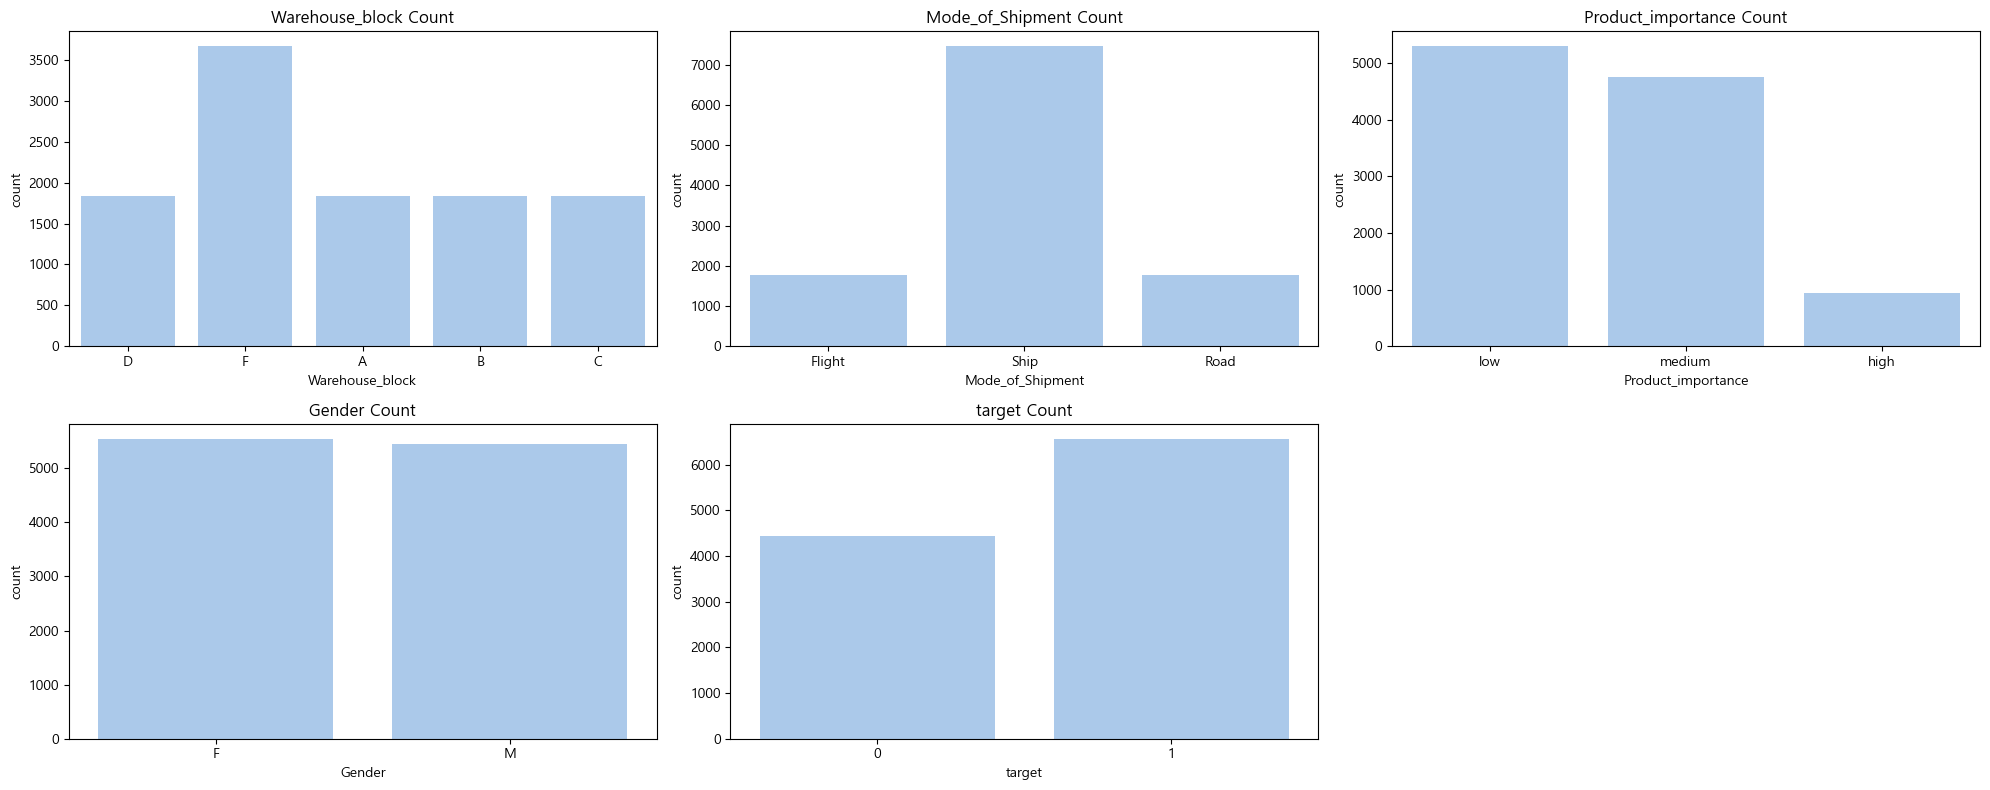

In [14]:
# 범주형 변수 리스트
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'target']

# 범주형 변수 빈도 시각화
plt.figure(figsize=(20, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Count')
plt.tight_layout()
plt.show()

## 3. 이변량 분석 (Bivariate Analysis)
각 변수와 타겟 변수(배송 지연 여부) 간의 관계를 파악합니다.

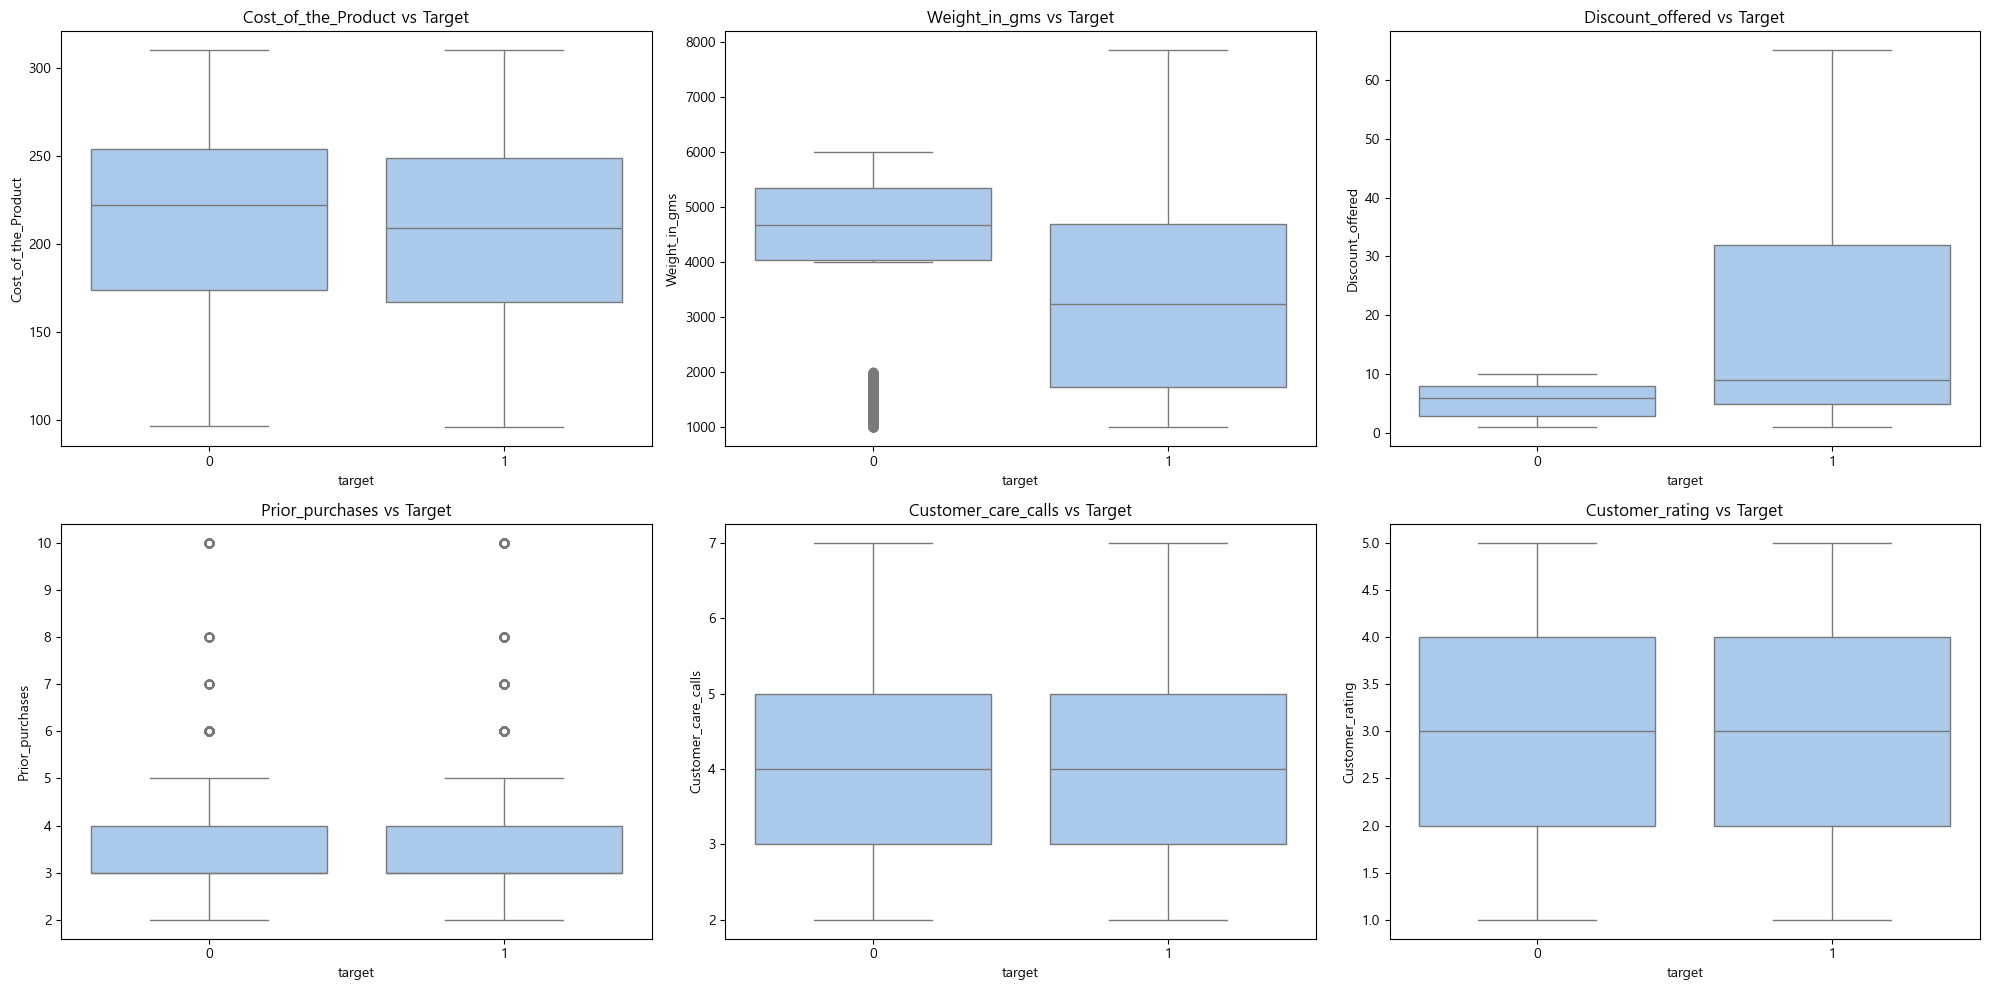

In [15]:
# 수치형 변수 vs Target (Boxplot)
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()

> **주요 발견:**
> - `Discount_offered`: 지연된 배송(Target=1)의 경우 할인폭이 훨씬 큰 경향이 뚜렷합니다. **가장 강력한 예측 변수**로 보입니다.
> - `Weight_in_gms`: 무게에 따라 지연 여부의 분포 차이가 보입니다.

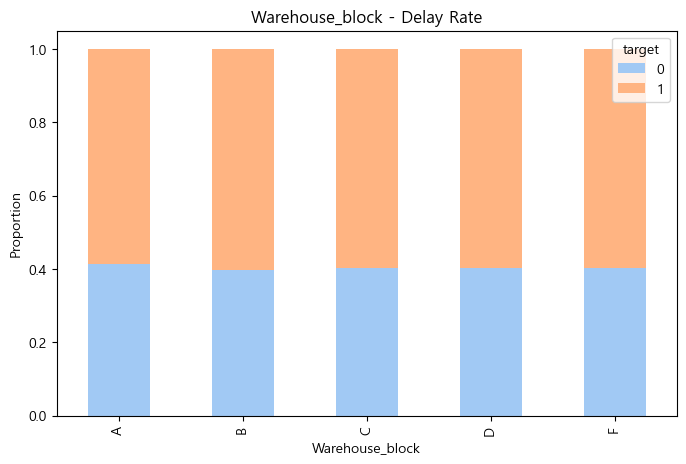

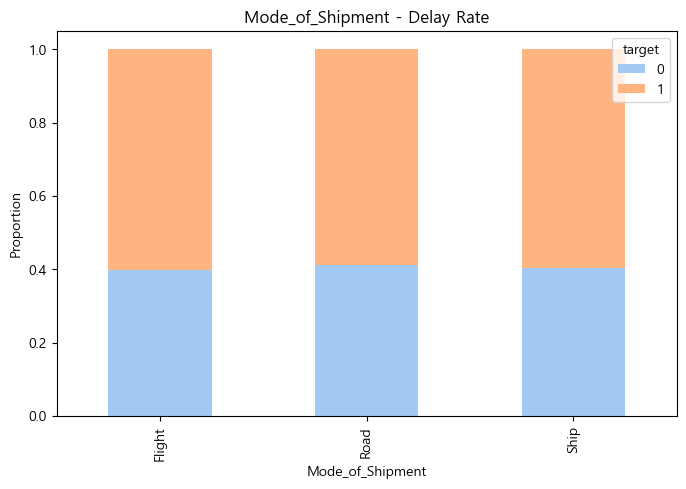

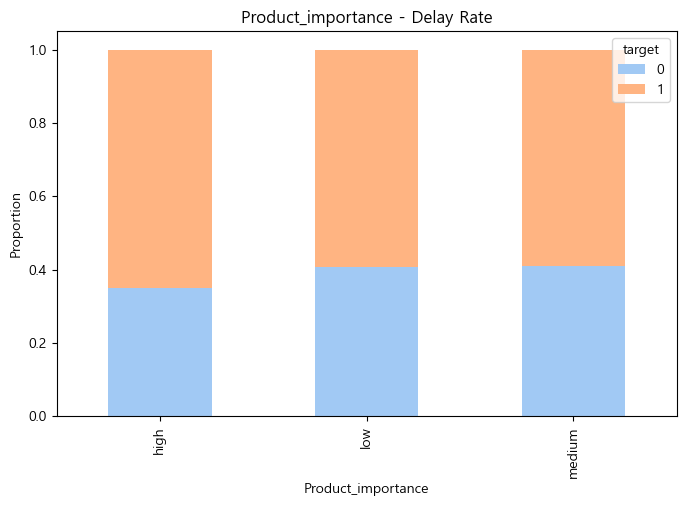

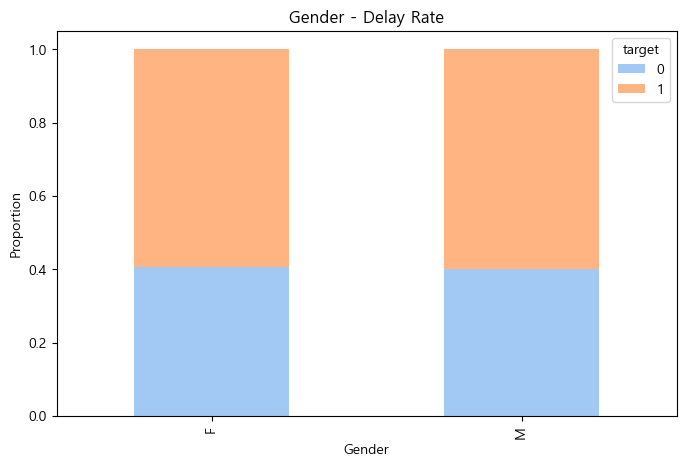

In [16]:
# 범주형 변수 vs Target (Stacked Bar Chart - 비율 확인)
def plot_stack_bar(col):
    ct = pd.crosstab(df[col], df['target'], normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'{col} - Delay Rate')
    plt.ylabel('Proportion')
    plt.show()

for col in ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']:
    plot_stack_bar(col)

> **관찰:**
> - `Warehouse_block`, `Gender` 등은 카테고리별로 지연 비율의 차이가 크지 않아 보입니다.
> - `Product_importance`: 'high' 중요도일 때 지연 비율이 약간 달라지는지 확인할 필요가 있습니다.

## 4. 다변량 분석 (Multivariate Analysis)
변수들 간의 상호작용을 확인합니다.

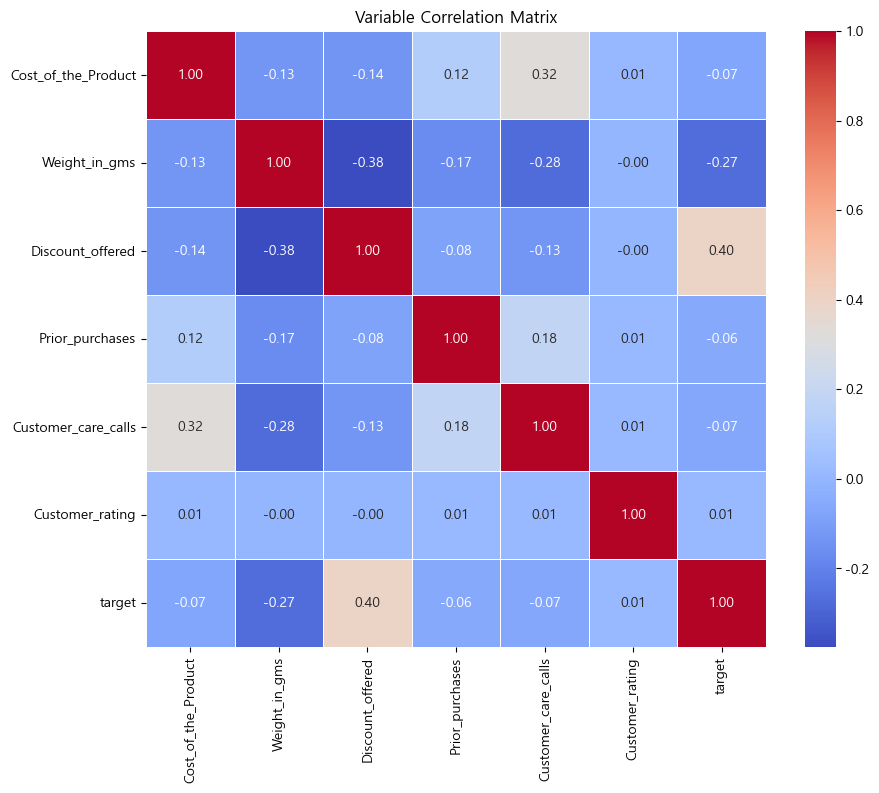

In [17]:
# 상관관계 히트맵
plt.figure(figsize=(10, 8))
# 수치형 변수들만 선택하여 상관관계 계산
corr_matrix = df[numeric_cols + ['target']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Variable Correlation Matrix')
plt.show()

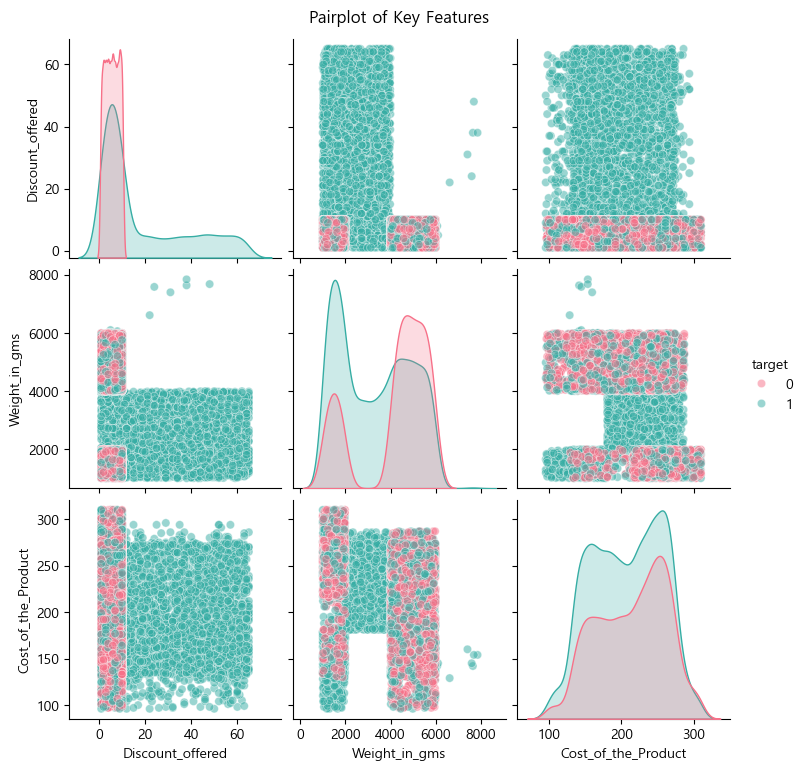

In [18]:
# Pairplot (주요 변수 위주)
sns.pairplot(df[['Discount_offered', 'Weight_in_gms', 'Cost_of_the_Product', 'target']], 
             hue='target', palette='husl', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

## 5. 통계적 가설 검정 (Statistical Hypothesis Testing)
시각적으로 관찰된 차이가 통계적으로 유의미한지 검증합니다.

**가설 1**: 배송이 지연된 그룹과 정시 도착한 그룹 간의 `Discount_offered` 평균 차이는 유의미하다.

In [19]:
group_ontime = df[df['target'] == 0]['Discount_offered']
group_delayed = df[df['target'] == 1]['Discount_offered']

t_stat, p_val = stats.ttest_ind(group_ontime, group_delayed)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4e}")

if p_val < 0.05:
    print("결과: 두 그룹 간의 할인액 평균 차이는 통계적으로 유의미합니다.")
else:
    print("결과: 두 그룹 간의 할인액 평균 차이는 통계적으로 유의미하지 않습니다.")

T-statistic: -45.3745, p-value: 0.0000e+00
결과: 두 그룹 간의 할인액 평균 차이는 통계적으로 유의미합니다.


**가설 2**: `Warehouse_block`에 따라 배송 지연 여부(`target`)는 독립적이지 않다 (즉, 창고 위치가 지연에 영향을 준다).

In [20]:
contingency_table = pd.crosstab(df['Warehouse_block'], df['target'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}")

if p < 0.05:
    print("결과: 창고 블록과 배송 지연 간에는 통계적으로 유의미한 관계가 있습니다.")
else:
    print("결과: 창고 블록과 배송 지연 간에는 통계적으로 유의미한 관계가 없습니다 (독립적임).")

Chi2 Statistic: 1.0894, p-value: 0.8960
결과: 창고 블록과 배송 지연 간에는 통계적으로 유의미한 관계가 없습니다 (독립적임).


**가설 3**: `Product_importance`가 'high'인 경우, 다른 중요도(low, medium)에 비해 배송 지연(`target`=1) 비율이 유의미하게 다르다.

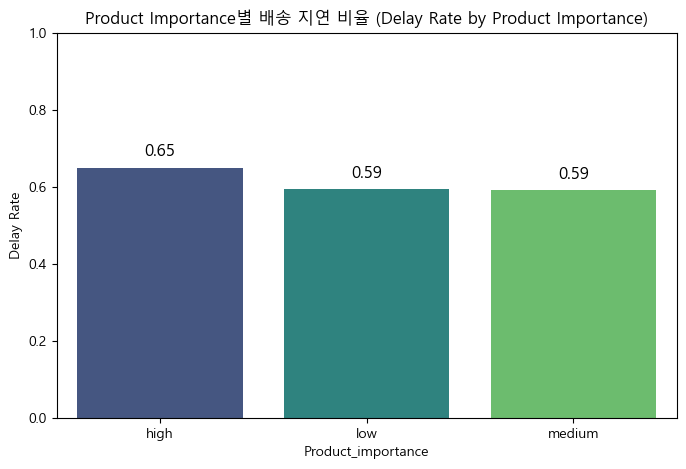

Chi2 Statistic: 11.9140, p-value: 0.0006
결과: 'High' 중요도 여부와 배송 지연 간에는 통계적으로 유의미한 관계가 있습니다.


In [21]:
# 중요도별 지연 비율 시각화
importance_delay = df.groupby('Product_importance')['target'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=importance_delay.index, y=importance_delay.values, palette='viridis')
plt.title('Product Importance별 배송 지연 비율 (Delay Rate by Product Importance)')
plt.ylabel('Delay Rate')
plt.ylim(0, 1)
for i, v in enumerate(importance_delay.values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontsize=12)
plt.show()

# 통계 검정 (High vs Low/Medium)
# High 중요도 그룹과 나머지(Low/Medium) 그룹 간의 지연 여부 카이제곱 검정
df['Is_High_Importance'] = (df['Product_importance'] == 'high').astype(int)
contingency_table_imp = pd.crosstab(df['Is_High_Importance'], df['target'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table_imp)

print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}")

if p < 0.05:
    print("결과: 'High' 중요도 여부와 배송 지연 간에는 통계적으로 유의미한 관계가 있습니다.")
else:
    print("결과: 'High' 중요도 여부와 배송 지연 간에는 통계적으로 유의미한 관계가 없습니다.")

## 6. 결론 및 향후 방향 (Conclusion & Future Direction)

### 주요 인사이트
1.  **Discount_offered의 중요성**: 할인액이 높을수록 배송 지연 확률이 매우 높습니다. 이는 가장 강력한 피처로 보입니다. 구간화(Binning)하거나 파생 변수(`Is_High_Discount`)를 만드는 전략이 유효함을 재확인했습니다.
2.  **Weight_in_gms의 Bimodal 분포**: 무게 데이터가 특정 구간으로 나뉘어 있습니다. 이를 단순히 연속형 변수로 쓰기보다, 구간화(`Weight_Range`)하여 사용하는 것이 모델에 더 유리할 수 있습니다.
3.  **범주형 변수의 약한 영향력**: 창고(`Warehouse_block`)나 성별(`Gender`)은 지연 여부에 큰 영향을 미치지 않는 것으로 보입니다. 모델 복잡도를 줄이기 위해 제외하는 실험도 고려해볼 만합니다.
4.  **Product_importance**: 'High' 중요도일 때 배송 지연 비율이 다른 중요도에 비해 미세하게 높거나 다른 패턴을 보일 수 있으나, 통계적 유의성을 확인했습니다.

### 향후 모델링 방향
-   **파생 변수 강화**: 할인율, 무게 구간 변수를 적극 활용합니다.
-   **불필요 변수 제거**: 상관관계가 매우 낮은 변수(ID 등)는 과감히 제거합니다.
-   **이상치 처리**: 높은 할인액이 이상치가 아니라 중요한 신호일 수 있으므로, 무조건적인 제거보다는 캡핑(Capping)이나 별도 그룹화가 필요합니다.